In [ ]:
# Exercise 1 Preprocessing, artifacts and noise

In [ ]:
# 1. I downloaded the dataset from MyCourses page.

In [2]:
# 2.
import pandas as pd
data_var = pd.read_csv("samples.csv", header = None, skiprows = 2)

In [3]:
# 3.
import numpy as np
fs=500
start=0
stop=(len(data_var))/fs
step=1/fs
t=np.arange(start, stop, step, dtype=None)

# Time vector is needed because we need to plot the ECG signals as a function of time.
# Thus, we need to create a time vector that contains the time samples from the dataset.


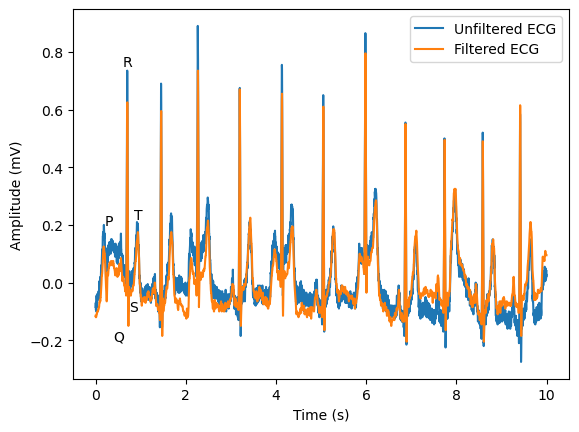

In [4]:
# 4.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t, data_var[1])
plt.plot(t, data_var[2])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.legend(["Unfiltered ECG","Filtered ECG"])
plt.text(0.2, 0.2, "P")
plt.text(0.4, -0.2, "Q")
plt.text(0.60, 0.75, "R")
plt.text(0.74, -0.1, "S")
plt.text(0.85, 0.22, "T")
plt.show()

# We can see that unfiltered signal has some noice. 
#Therefore, the signal is filtered and gets more clean
# and thus it is easier to see different wave peaks.


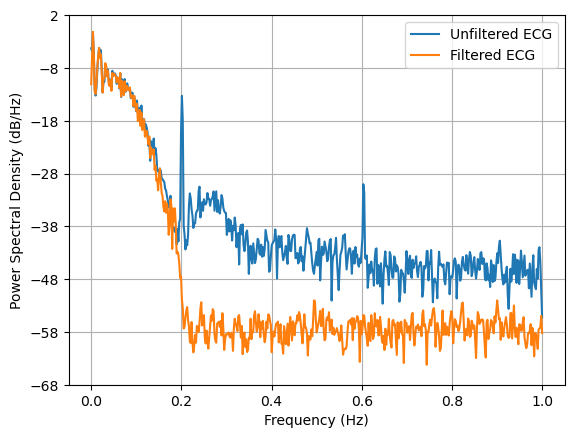

In [5]:
# 5.
import matplotlib.pyplot as plt
plt.figure()
plt.psd(data_var[1], NFFT = 1024)
plt.psd(data_var[2], NFFT = 1024)
plt.xlabel("Frequency (Hz)")
plt.legend(["Unfiltered ECG","Filtered ECG"])
plt.show()

# As the frequency increases, the signal power spectral density decreases.
# PSD is most powerful at low frequencies. Unfiltered ECG signal is more power distributed to other frequencies
# than filtered signal. In addition, filtered signal has lower PSD values than unfiltered one, starting from 0.2 Hz.


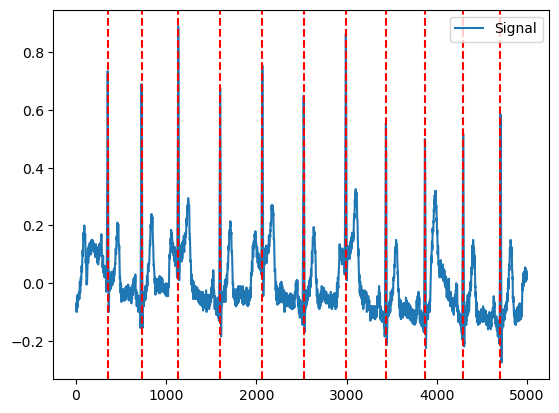

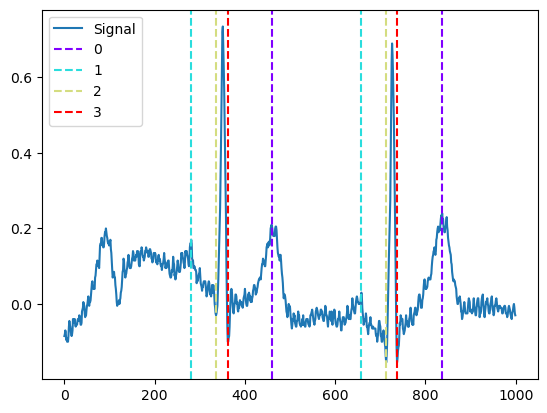

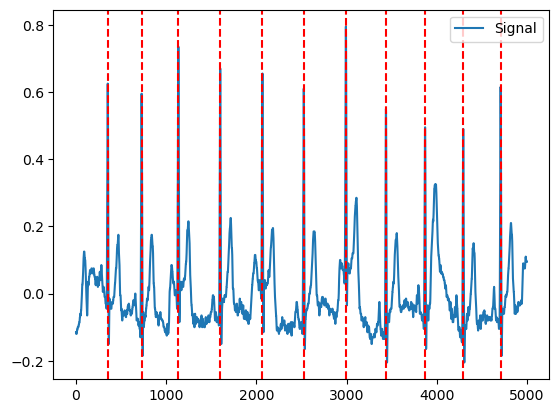

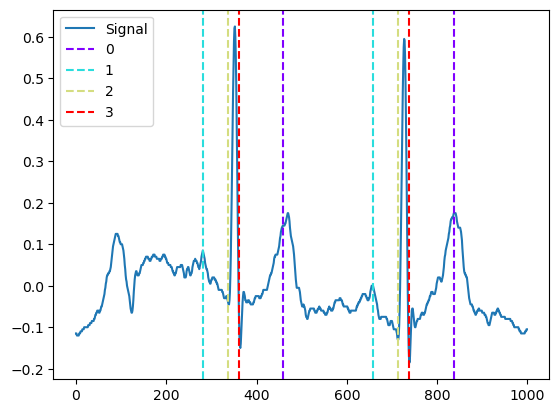

In [8]:
# 6.
import neurokit2 as nk

# Plotting wave-peaks for raw data.
raw_data = data_var[1]
_, rpeak = nk.ecg_peaks(raw_data)
rawplot_r = nk.events_plot(rpeak['ECG_R_Peaks'], raw_data)
_, waves_peak_raw = nk.ecg_delineate(raw_data, rpeak, method = "peak")
rawplot_others = nk.events_plot([waves_peak_raw['ECG_T_Peaks'][:2], 
                       waves_peak_raw['ECG_P_Peaks'][:2],
                       waves_peak_raw['ECG_Q_Peaks'][:2],
                       waves_peak_raw['ECG_S_Peaks'][:2]], raw_data[:1000])

# Doing the same for filtered data for comparison.
filt_data = data_var[2]
_, rpeak = nk.ecg_peaks(filt_data)
filtplot_r = nk.events_plot(rpeak['ECG_R_Peaks'], filt_data)
_, waves_peak_filt = nk.ecg_delineate(raw_data, rpeak, method = "peak")
filtplot_others = nk.events_plot([waves_peak_filt['ECG_T_Peaks'][:2], 
                       waves_peak_filt['ECG_P_Peaks'][:2],
                       waves_peak_filt['ECG_Q_Peaks'][:2],
                       waves_peak_filt['ECG_S_Peaks'][:2]], filt_data[:1000])

# Algorithm works well for unfiltered/raw data. P-peak (light-blue) is hard to differentiate from the noise.
# T-peak (purple) is pretty easy to detect from the signal. P-peak is difficult to detect because it is
# the first peak of ECG. T-peak is visible, since it is the repolarization of the ventricles.
